# Exploratory Data Analysis on Bioresponse dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..', 'src/data')))
sys.path.append(os.path.abspath(os.path.join('../..', 'src/initial_eda')))
from eda import *
from sklearn.datasets import fetch_openml
from dataset_interface import DataInterface
from data_loader import OpenMLDataLoader

In [3]:
dataset = DataInterface(OpenMLDataLoader(dataset_name='bioresponse'))

## Basic dataset info

In [3]:
print_basic_info(dataset.data)


Dataset shape:
(3751, 1776)

Dataset features count:
1776

Dataset observation count:
3751

Dataset description:
                D1           D2           D3           D4           D5  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.076948     0.592436     0.068142     0.038990     0.212112   
std       0.079989     0.105860     0.078414     0.115885     0.102592   
min       0.000000     0.282128     0.000000     0.000000     0.002630   
25%       0.033300     0.517811     0.000000     0.000000     0.138118   
50%       0.066700     0.585989     0.050000     0.000000     0.190926   
75%       0.100000     0.668395     0.100000     0.000000     0.261726   
max       1.000000     0.964381     0.950000     1.000000     1.000000   

                D6           D7           D8           D9          D10  ...  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  ...   
mean      0.686653     0.274713     0.455133     0.749517    

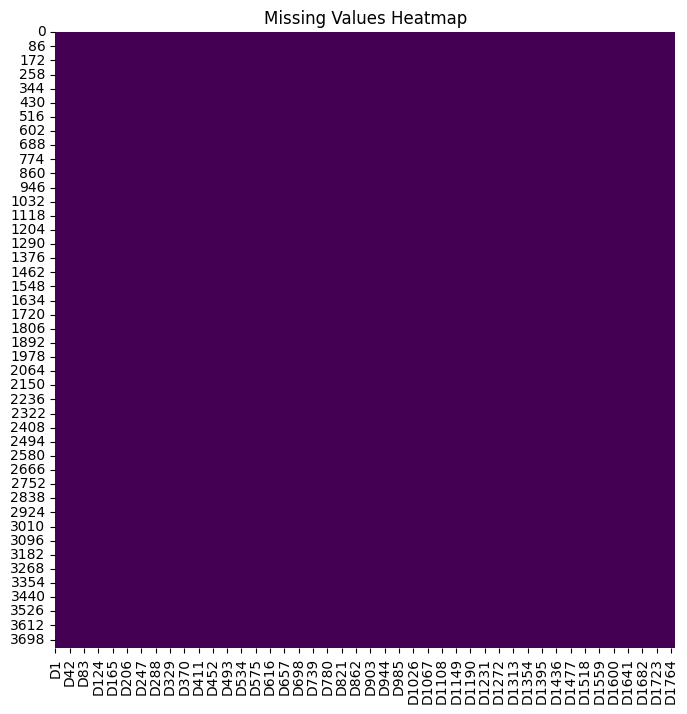

In [4]:
fig = figure_missing_values(dataset.data, (8,8))

## Target distribution

In [5]:
print_target_distribution_info(dataset.data)

        Count  Percentage
target                   
1        2034    54.22554
0        1717    45.77446


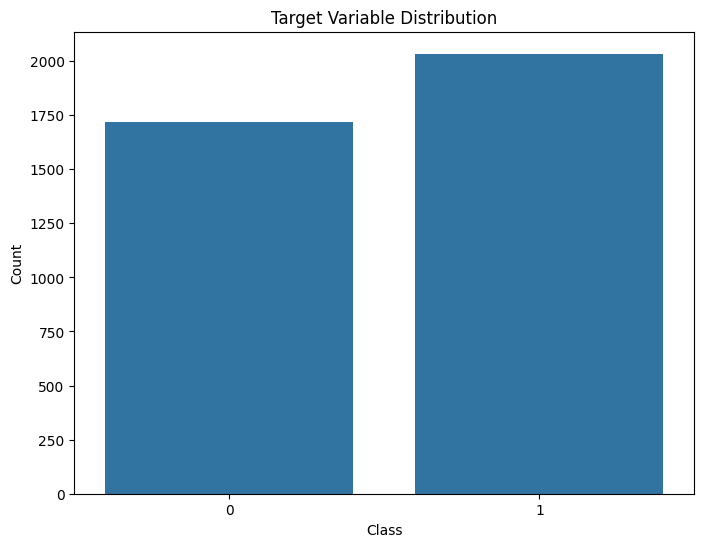

In [6]:
fig = figure_target_distribution(dataset.data)

## Features distribution

<Figure size 1500x1500 with 0 Axes>

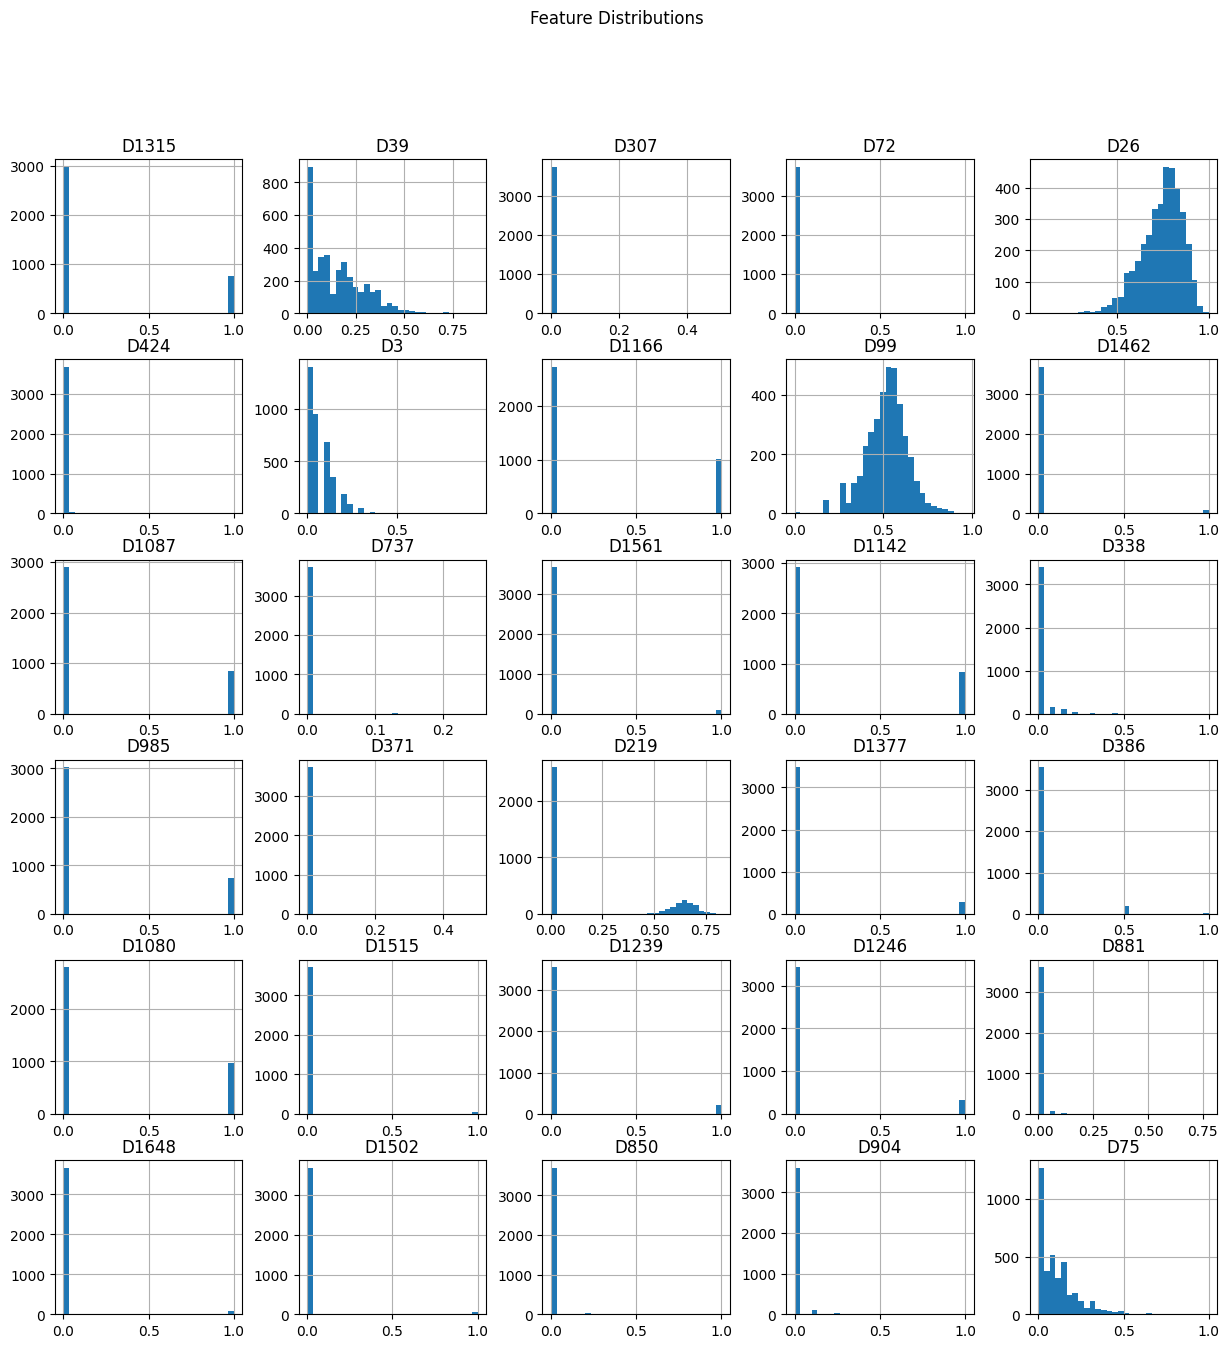

In [7]:
fig = figure_feature_distributions(dataset.data, num_features=30)

## Features correlation

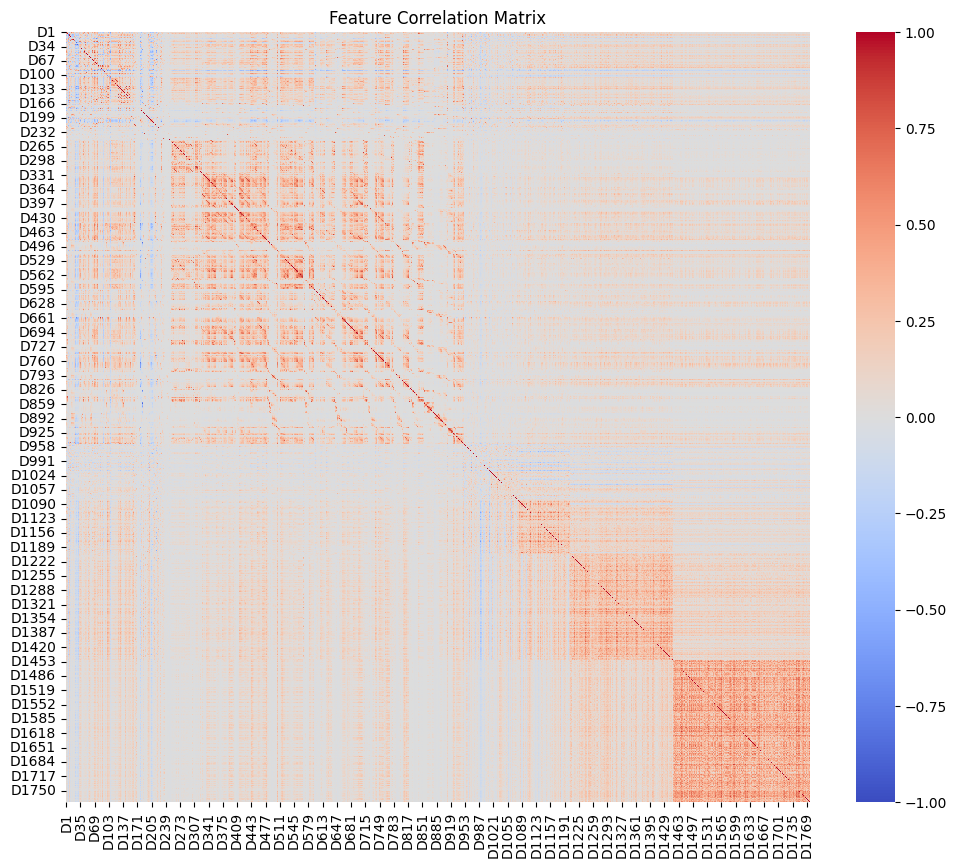

In [8]:
fig = figure_correlation_matrix(dataset.data)

Removed 525 correlated features.


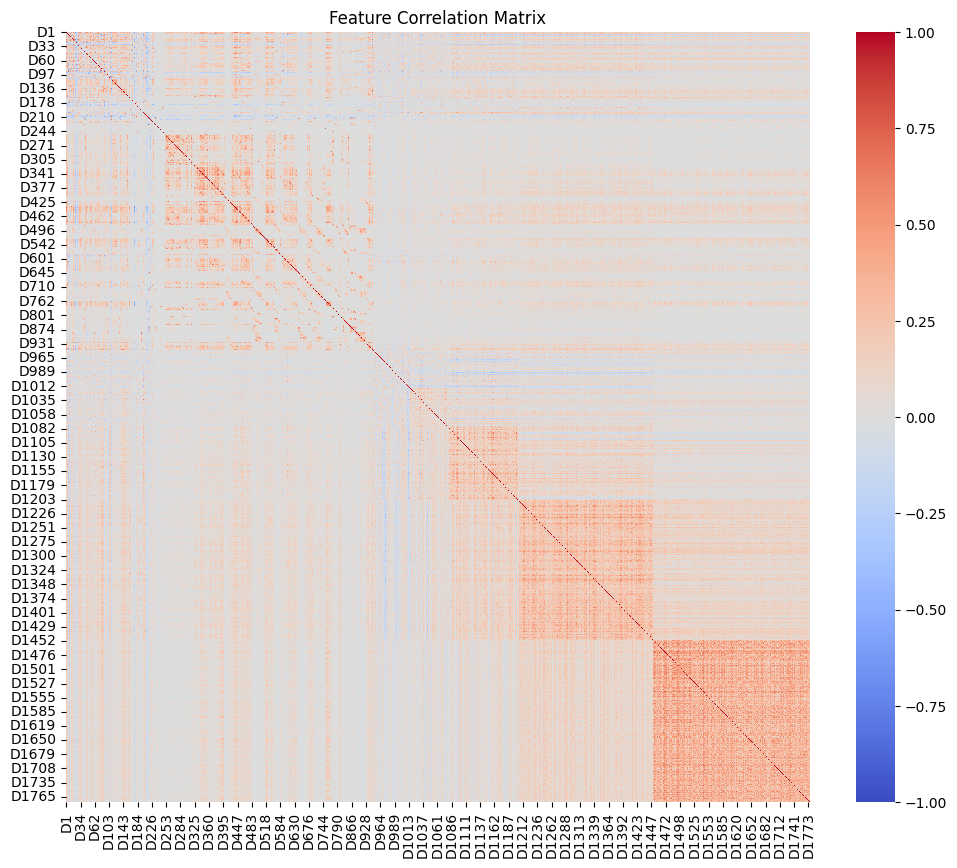

In [9]:
dataset.remove_correlated_features(threshold=0.75)

fig = figure_correlation_matrix(dataset.data)

Removed 725 correlated features.


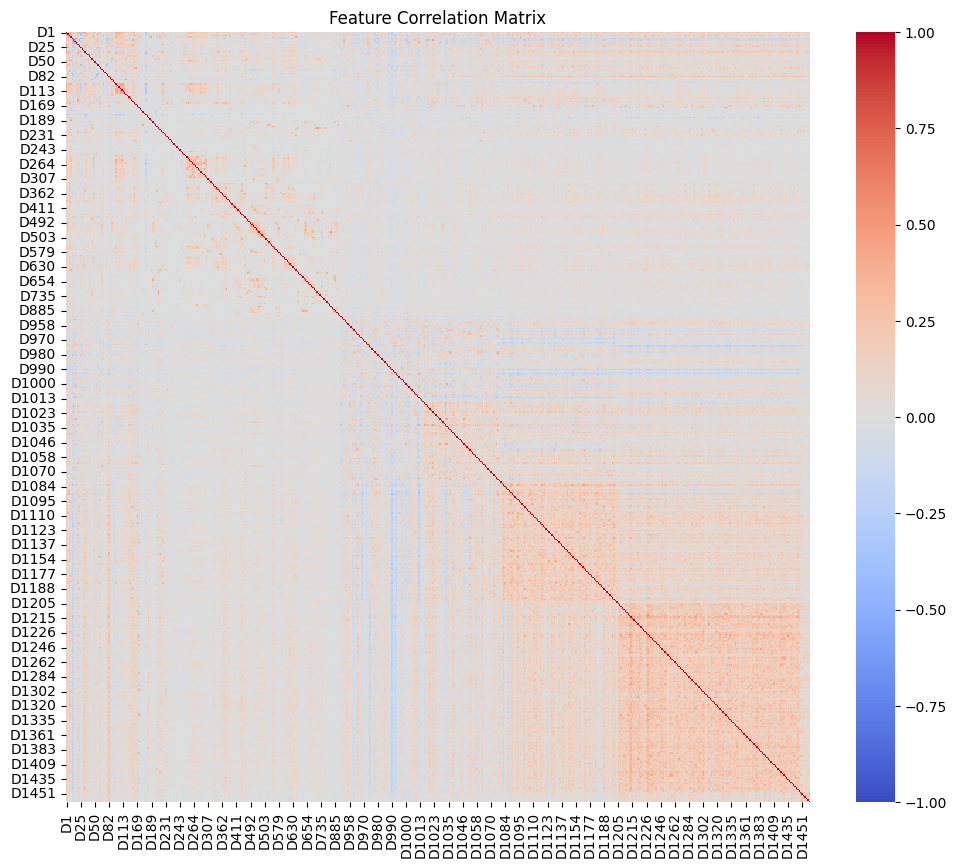

In [10]:
dataset.remove_correlated_features(threshold=0.5)

fig = figure_correlation_matrix(dataset.data)

## Data preprocessing

In [4]:
dataset.preprocess_data(missing_values_strategy='mean')

Removed 2 correlated features.
Adding 101 dummy features


## Features importance

In [12]:
print(feature_variance_explained(dataset.data))

       Variance Explained
D174             0.018722
D971             0.018473
D98              0.018432
D1054            0.018421
D285             0.018383
...                   ...
D6               0.012605
D169             0.012422
D1088            0.012290
D3               0.012275
D1               0.012085

[1875 rows x 1 columns]


## Logistic regression test

In [6]:
dataset.split_data(test_size=0.4, val_size=0)

model_no_reg = train_logistic_regression(dataset, regularization_type=None, solver='liblinear', max_iter=1000)
model_lasso = train_logistic_regression(dataset, regularization_type='l1', c=0.4, solver='liblinear', max_iter=1000)

No regularization:
Accuracy: 0.7221852098600933
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       667
           1       0.76      0.73      0.74       834

    accuracy                           0.72      1501
   macro avg       0.72      0.72      0.72      1501
weighted avg       0.72      0.72      0.72      1501

Confiusion matrix:
[[475 192]
 [225 609]]
l1:
Accuracy: 0.737508327781479
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       667
           1       0.77      0.75      0.76       834

    accuracy                           0.74      1501
   macro avg       0.73      0.74      0.74      1501
weighted avg       0.74      0.74      0.74      1501

Confiusion matrix:
[[482 185]
 [209 625]]
